In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_data():
    # 导入数据
    datafile = './dataset/housing.data'
    data = np.fromfile(datafile, sep='  ')

    feature_num = 14

    # reshape原始数据为[:, 14]
    data = np.reshape(a=data, newshape=[data.shape[0] // feature_num, feature_num])

    # 原数据集拆分成80%训练集和20%测试集
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = \
                                training_data.max(axis=0), \
                                training_data.min(axis=0), \
                                training_data.sum(axis=0) / training_data.shape[0]

    # 数据归一化
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 划分训练集和测试集
    training_data = data[:offset]
    test_data = data[offset:]
    
    return training_data, test_data

In [19]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b

    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                
            if epoch_id % 5 == 0:
                print('epoch {:3d}, loss={:.4f}'.format(epoch_id, loss))

        return losses

In [4]:
def train():
    # 获取数据
    train_data, test_data = load_data()

    # 网络实例化
    net = Network(13)
    # 启动训练
    losses = net.train(train_data, num_epochs=100, batch_size=100, eta=0.1)

    # 画出损失函数的变化趋势
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y)
    plt.show()

In [17]:
def plot_3D_neural_work_weight():
    # 获取数据
    training_data, test_data = load_data()
    x = training_data[:, :-1]
    y = training_data[:, -1:]

    net = Network(13)
    losses = []
    #只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
    w5 = np.arange(-160.0, 160.0, 1.0)
    w9 = np.arange(-160.0, 160.0, 1.0)
    losses = np.zeros([len(w5), len(w9)])

    #计算设定区域内每个参数取值所对应的Loss
    for i in range(len(w5)):
        for j in range(len(w9)):
            net.w[5] = w5[i]
            net.w[9] = w9[j]
            z = net.forward(x)
            loss = net.loss(z, y)
            losses[i, j] = loss

    #使用matplotlib将两个变量和对应的Loss作3D图
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    
    fig.add_axes(ax)

    w5, w9 = np.meshgrid(w5, w9)

    ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
    plt.show()

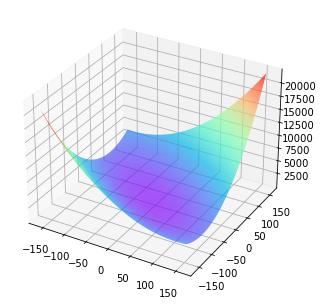

epoch   0, loss=0.3366
epoch   5, loss=0.6531
epoch  10, loss=2.3681
epoch  15, loss=0.0484
epoch  20, loss=0.9485
epoch  25, loss=0.2203
epoch  30, loss=0.0437
epoch  35, loss=0.0887
epoch  40, loss=0.0136
epoch  45, loss=0.0423
epoch  50, loss=0.0098
epoch  55, loss=0.0164
epoch  60, loss=0.1242
epoch  65, loss=0.0435
epoch  70, loss=0.0067
epoch  75, loss=0.0312
epoch  80, loss=0.0250
epoch  85, loss=0.0151
epoch  90, loss=0.0467
epoch  95, loss=0.0507


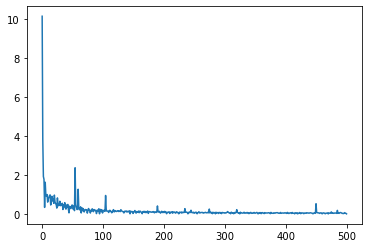

In [20]:
if __name__ == '__main__':
    plot_3D_neural_work_weight()
    train()